This plots ROI values extracted from images that have been normalized using DARTEL, 
but the values have been extracted from ROI derived from a prior analysis done using images normalized using DARTEL.

In [5]:
%run /home/grg/git/alfa/nilearn-helper.py
%matplotlib inline
%run /home/grg/git/alfa/roicollect.py

This collect the values from \*\_stats.csv files, i.e. values that have been extracted from ROI manually drawn in MNI space.
The bad thing with this is that the ROI is defined in a reference space. This is subject to individual registration errors.

using default groups
Standard deviation of label Inferior longitudinal fasciculus L: 4.58018468745e-05
Model used for correction: roi ~ 1 + gender + age
Standard deviation after correction for covariates: 4.40424304465e-05
Region: Inferior longitudinal fasciculus L
0.00348517690849
0.0904837623275
0.109210757388
Standard deviation of label Inferior longitudinal fasciculus R: 4.3120643252e-05
Model used for correction: roi ~ 1 + gender + age
Standard deviation after correction for covariates: 4.22217135943e-05
Region: Inferior longitudinal fasciculus R
0.000228605189906
0.0321146078533
0.0563294096954
Standard deviation of label Superior longitudinal fasciculus L: 4.75471440914e-05
Model used for correction: roi ~ 1 + gender + age
Standard deviation after correction for covariates: 4.56138806551e-05
Region: Superior longitudinal fasciculus L
0.00295220068672
0.0105322170571
0.533515461895
Standard deviation of label Superior longitudinal fasciculus R: 3.91189075734e-05
Model used for co

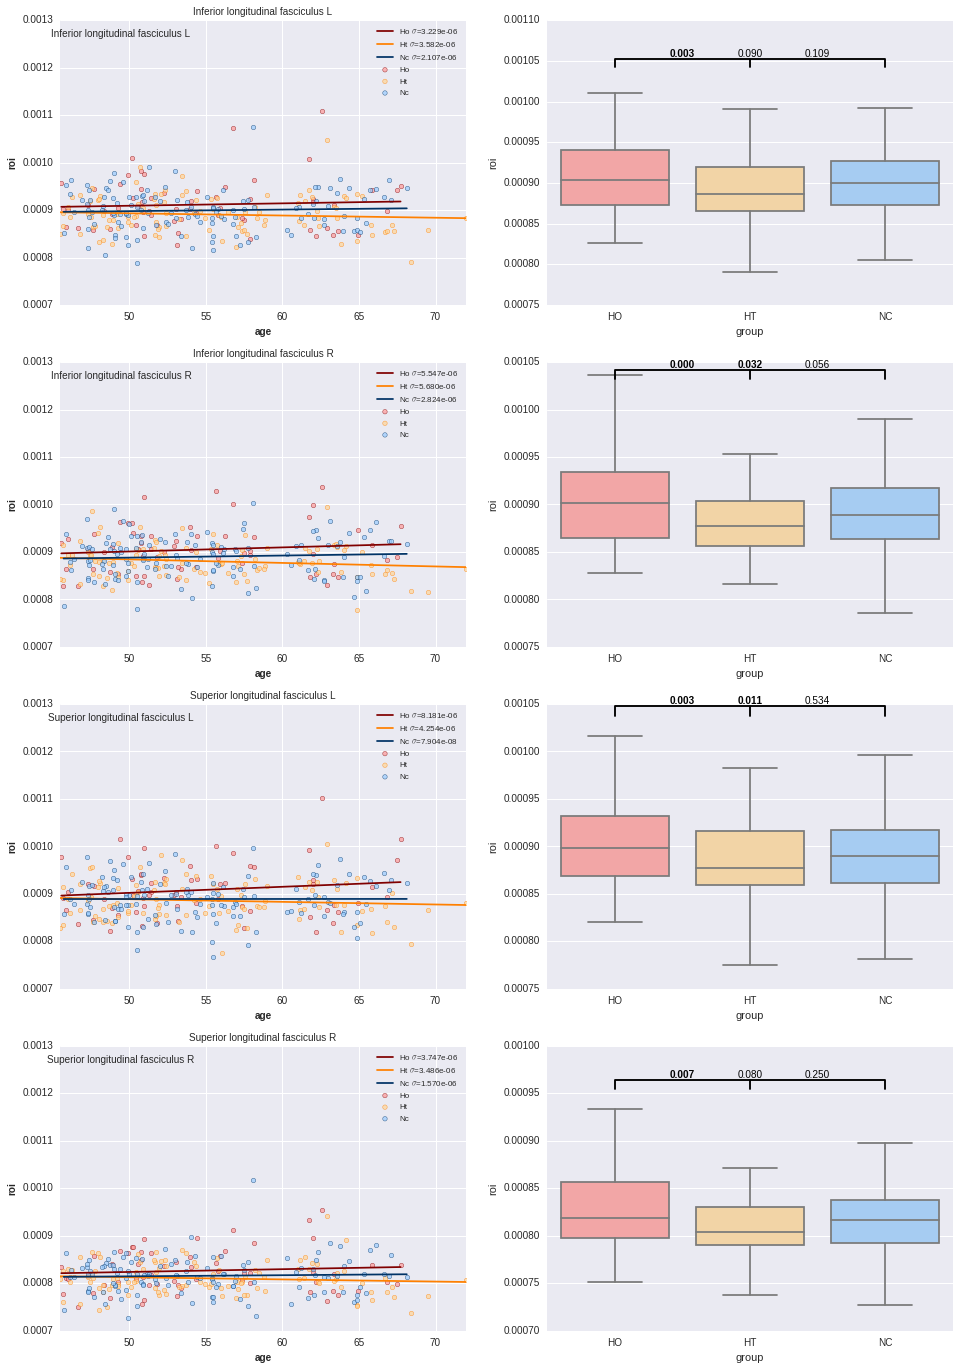

In [6]:
regions = range(12,16)
#for x in [9]: #,10,11,12,13]:
#    regions.remove(x)
names = {0: 'Anterior thalamic radiation L',
 1: 'Anterior thalamic radiation R',
 2: 'Corticospinal tract L',
 3: 'Corticospinal tract R',
 4: 'Cingulum (cingulate gyrus) L',
 5: 'Cingulum (cingulate gyrus) R',
 6: 'Cingulum (hippocampus) L',
 7: 'Cingulum (hippocampus) R',
 8: 'Forceps major',
 9: 'Forceps minor',
 10: 'Inferior fronto-occipital fasciculus L',
 11: 'Inferior fronto-occipital fasciculus R',
 12: 'Inferior longitudinal fasciculus L',
 13: 'Inferior longitudinal fasciculus R',
 14: 'Superior longitudinal fasciculus L',
 15: 'Superior longitudinal fasciculus R',
 16: 'Uncinate fasciculus L',
 17: 'Uncinate fasciculus R',
 18: 'Superior longitudinal fasciculus (temporal part) L',
 19: 'Superior longitudinal fasciculus (temporal part) R'}

data = pd.read_excel('/home/grg/spm/data/covariates.xls')
data = data.set_index(data['subject'])
data = data.sort_values(['apo', 'subject'])
src = '/home/grg/roivalues/roivalues_tracts_tbss_L2_skel/'
filepattern = '*_stats.csv'
csvfiles = glob(osp.join(src, filepattern))
subjects = [string.atoi(e.split('/')[-1].split('_')[0]) for e in csvfiles]

to_remove = [10551, 10397, 11383, 13083, 10701, 21092] # failed DARTEL subjects

# remove wrong subjects
data = data[~data['subject'].isin(to_remove)]
for e in to_remove:
    if e in subjects:
        s = subjects.index(e)
        subjects.pop(s)
        csvfiles.pop(s)
values = collect_roivalues(3, csvfiles=csvfiles, subjects=subjects)

#data.join(values)
#poly = ols(formula='roi ~ 1 + age', data=data.join(values)).fit()
plot_regions(data, regions, csvfiles, subjects,  names=names,ylim=[0.0007,0.0013])